In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader.yahoo.daily import YahooDailyReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['GOOG','MSFT']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MSFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-17 00:00:00-05:00,259.390015,260.089996,256.000000,258.059998,258.059998,29979600,MSFT
2023-02-21 00:00:00-05:00,254.479996,255.490005,251.589996,252.669998,252.669998,28397400,MSFT
2023-02-22 00:00:00-05:00,254.089996,254.339996,250.339996,251.509995,251.509995,22491100,MSFT
2023-02-23 00:00:00-05:00,255.559998,256.839996,250.479996,254.770004,254.770004,29219100,MSFT
2023-02-24 00:00:00-05:00,249.960007,251.000000,248.100006,249.220001,249.220001,24990900,MSFT
2023-02-27 00:00:00-05:00,252.460007,252.820007,249.389999,250.160004,250.160004,21190000,MSFT
2023-02-28 00:00:00-05:00,249.070007,251.490005,248.729996,249.419998,249.419998,22491000,MSFT
2023-03-01 00:00:00-05:00,250.759995,250.929993,245.789993,246.270004,246.270004,27565300,MSFT
2023-03-02 00:00:00-05:00,246.550003,251.399994,245.610001,251.110001,251.110001,24808200,MSFT


In [2]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,120.126100,121.513120,118.774674,120.142421,120.142421,2.695577e+07
std,18.277129,18.196058,18.182458,18.184906,18.184906,1.060279e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,103.568499,104.691586,102.357689,103.589998,103.589998,2.013650e+07
50%,118.453999,119.931000,117.117699,118.825001,118.825001,2.461250e+07
75%,137.111145,138.404129,135.722248,137.012375,137.012375,3.103952e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,9.779860e+07


In [3]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2021-03-04 00:00:00-05:00 to 2023-03-03 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          504 non-null    float64
 1   High          504 non-null    float64
 2   Low           504 non-null    float64
 3   Close         504 non-null    float64
 4   Adj Close     504 non-null    float64
 5   Volume        504 non-null    int64  
 6   company_name  504 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.5+ KB


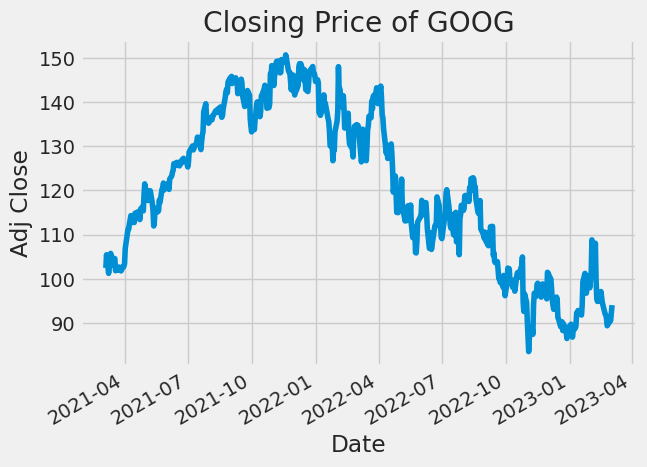

In [4]:
GOOG['Adj Close'].plot()
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title('Closing Price of GOOG')

plt.show()

In [5]:
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())


In [7]:
from sklearn.preprocessing import MinMaxScaler
df = DataReader('GOOG', data_source='stooq', start='2020-01-01', end=datetime.now())
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 10
pred_size = 1

for i in range(dat_size, len(train_data)-pred_size, pred_size):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i:i+pred_size, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037])]
[array([0.01919393])]

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037]), array([0.02674461, 0.02554697, 0.029588  , 0.02952455, 0.03061115,
       0.02006242, 0.01808354, 0.02472607, 0.02839037, 0.01919393])]
[array([0.01919393]), array([0.01508945])]



In [8]:
#df.sort_values()

Text(0, 0.5, 'Close Price (USD)')

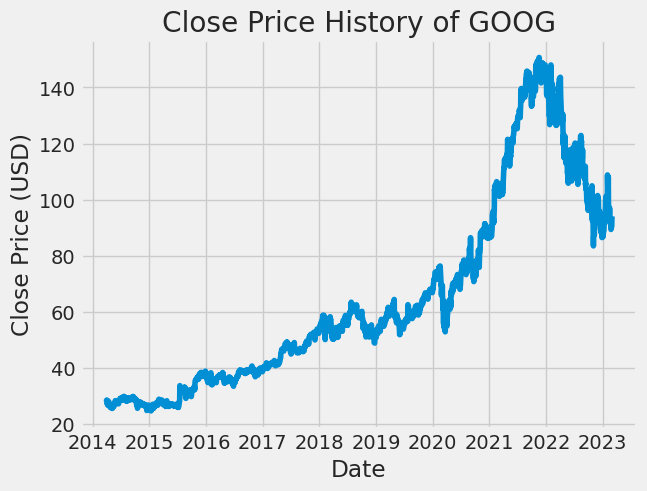

In [9]:
plt.title('Close Price History of GOOG')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

In [10]:
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1800

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.52253899],
       [0.53681547],
       [0.55037813]])

In [20]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 10
pred_size = 1

for i in range(dat_size, len(train_data)-pred_size, pred_size):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i:i+pred_size, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037])]
[array([0.01919393])]

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037]), array([0.02674461, 0.02554697, 0.029588  , 0.02952455, 0.03061115,
       0.02006242, 0.01808354, 0.02472607, 0.02839037, 0.01919393])]
[array([0.01919393]), array([0.01508945])]

(1789, 10, 1)
(1789, 1, 1)


In [26]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1789/1789 [==============================] - 8s 4ms/step - loss: 7.9418e-04


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

15/15 [==============================] - 0s 2ms/step


4.256801273446195

/tmp/ipykernel_3937/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


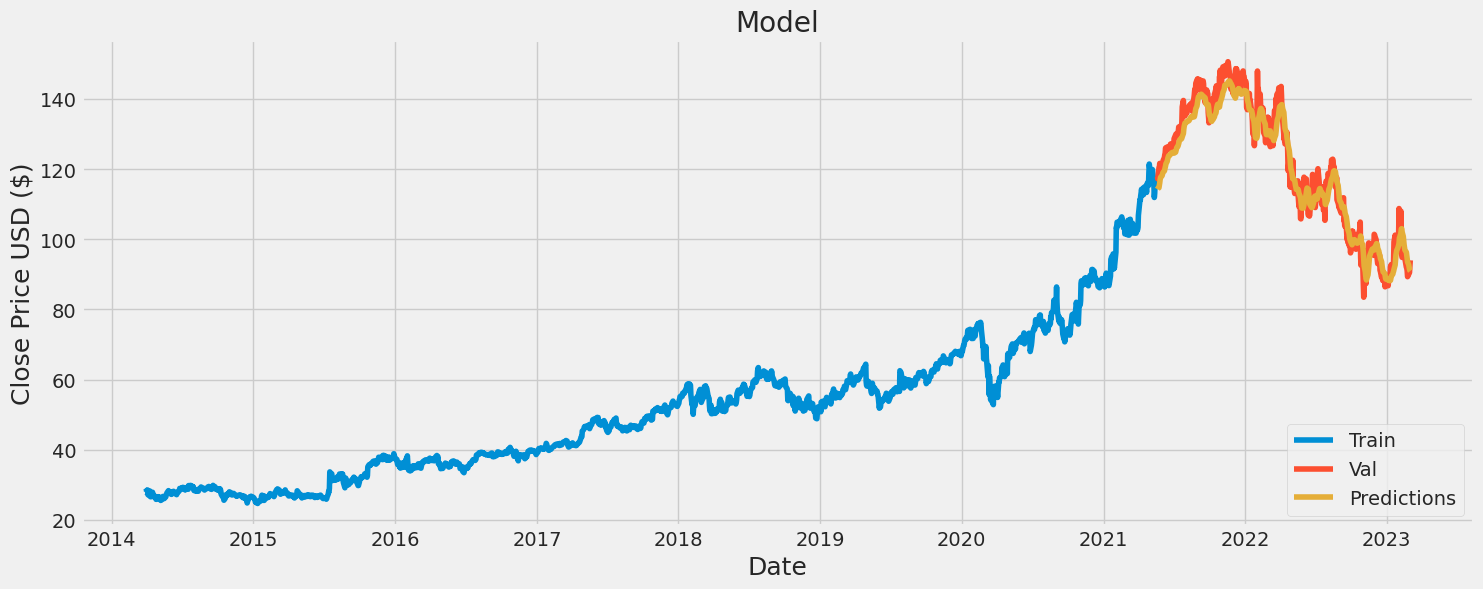

In [29]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell, Dense
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from keras.models import Sequential
tf.random.set_seed(100)

In [31]:
class LSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = 2*units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.glorot_uniform(seed=1000)
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]

In [34]:
# Build the LSTM model
cell = LSTM(8)
layer = RNN(cell, return_sequences=True)

cell2 = LSTM(300)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
model.add(layer)
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1699/1699 [==============================] - 541s 316ms/step - loss: 8.4292e-04


In [18]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

forecast = np.zeros([len(x_test), 1])
x_now = x_test[0].reshape(1,x_test.shape[1],1)
print(x_now[0])
for i in range(len(forecast)):
    x_ = model.predict(x_now)
        
    forecast[i] = x_
    
    x_now[:][:-1] = x_now[:][1:]
    if (i%len(forecast) == 0):
        x_now[:][-1] = x_test[i]
    else:
        x_now[:][-1] = x_

print(x_now[0])

forecast = scaler.inverse_transform(forecast)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

rmse2 = np.sqrt(np.mean(((forecast - y_test) ** 2)))
print(rmse2)

15/15 [==============================] - 0s 29ms/step
[[0.491678  ]
 [0.4942438 ]
 [0.50901203]
 [0.50212363]
 [0.4945095 ]
 [0.4994111 ]
 [0.49003621]
 [0.4950647 ]
 [0.49283202]
 [0.51343774]
 [0.52135325]
 [0.50529618]
 [0.49729738]
 [0.50041045]
 [0.49477124]
 [0.49318893]
 [0.51486935]
 [0.55295583]
 [0.5546809 ]
 [0.55856728]
 [0.55791294]
 [0.56498773]
 [0.53070435]
 [0.54352145]
 [0.53266736]
 [0.55868625]
 [0.56906049]
 [0.62559931]
 [0.6225378 ]
 [0.63667152]
 [0.63465695]
 [0.6309292 ]
 [0.63563251]
 [0.63583079]
 [0.63909852]
 [0.64614951]
 [0.64869549]
 [0.64428564]
 [0.63791674]
 [0.62353716]
 [0.62590864]
 [0.63554526]
 [0.61024417]
 [0.6124253 ]
 [0.63013606]
 [0.62788355]
 [0.60840409]
 [0.6172793 ]
 [0.64085135]
 [0.60738887]
 [0.61870695]
 [0.61963492]
 [0.64331801]
 [0.62236331]
 [0.62417167]
 [0.63449832]
 [0.63392726]
 [0.61217149]
 [0.61493954]
 [0.61310739]
 [0.61881006]
 [0.61567716]
 [0.61539956]
 [0.61190976]
 [0.61999183]
 [0.6198332 ]
 [0.62502826]
 [0.6524

ValueError: could not broadcast input array from shape (10,) into shape (1,)

In [19]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

ValueError: Expected a 1D array, got an array with shape (449, 10)

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#10plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

ValueError: Expected a 1D array, got an array with shape (449, 10)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from datetime import datetime
import numpy as np
df = DataReader('GOOG', data_source='stooq', start='2013-01-01', end='2022-09-20')
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaler.scale_, scaler.min_)
#[0.0102168]
scaler = MinMaxScaler(feature_range=(0,1))
scaler.scale_ = [0.00793138]
scaler.min_ = [-0.19533]

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 10
pred_size = 1

for i in range(dat_size, len(train_data)):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i:i+pred_size, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(y_train.shape)


[0.00793138] [-0.19533]
[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037])]
[array([0.01919393])]

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037]), array([0.02674461, 0.02554697, 0.029588  , 0.02952455, 0.03061115,
       0.02006242, 0.01808354, 0.02472607, 0.02839037, 0.01919393])]
[array([0.01919393]), array([0.01508945])]

(1700, 1)


In [2]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from CV_quantum_layers import QuantumLayer_MultiQunode, Activation_Layer
from QLSTM import QLSTM
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.layers import RNN, LSTMCell, Dense
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from keras.models import Sequential
tf.random.set_seed(100)


cell2 = QLSTM(2)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
model.add(layer2)
model.add(Dense(35))
model.add(Dense(pred_size))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
model.save('Trained_Quantum')

2023-03-04 16:21:08.774000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 16:21:10.661151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-04 16:21:10.771239: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-04 16:21:10.771527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there m

629/629 [==============================] - 2715s 4s/step - loss: 0.0805


ValueError: in user code:

    File "/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/keras/saving/legacy/saving_utils.py", line 147, in _wrapped_model  *
        outputs = model(*args, **kwargs)
    File "/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filecqsatt_p.py", line 12, in tf__call
        y_ft = ag__.converted_call(ag__.ld(self).recurrent_activation, (ag__.converted_call(ag__.ld(self).f_q, (ag__.converted_call(ag__.ld(self).quantum_prep, (ag__.converted_call(ag__.ld(self).f, (ag__.ld(x),), None, fscope),), None, fscope),), None, fscope),), None, fscope)
    File "/tmp/__autograph_generated_filew8f3ofuw.py", line 11, in tf__call
        output = ag__.converted_call(ag__.ld(tf).concat, ([ag__.converted_call(ag__.ld(self).circuit_layer[ag__.ld(i)], (ag__.ld(x_split)[ag__.ld(i)],), None, fscope) for i in ag__.converted_call(ag__.ld(range), (ag__.ld(self).n_circuits,), None, fscope)],), dict(axis=1), fscope)
    File "/tmp/__autograph_generated_filew8f3ofuw.py", line 11, in <listcomp>
        output = ag__.converted_call(ag__.ld(tf).concat, ([ag__.converted_call(ag__.ld(self).circuit_layer[ag__.ld(i)], (ag__.ld(x_split)[ag__.ld(i)],), None, fscope) for i in ag__.converted_call(ag__.ld(range), (ag__.ld(self).n_circuits,), None, fscope)],), dict(axis=1), fscope)
    File "/tmp/__autograph_generated_fileovq2ds0l.py", line 58, in tf__call
        ag__.if_stmt(ag__.and_(lambda : ag__.converted_call(ag__.ld(len), (ag__.converted_call(ag__.ld(tf).shape, (ag__.ld(inputs),), None, fscope),), None, fscope) > 1, lambda : ag__.ld(self).argnum is None), if_body, else_body, get_state_1, set_state_1, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_fileovq2ds0l.py", line 40, in if_body
        ag__.for_stmt(ag__.converted_call(ag__.ld(tf).unstack, (ag__.ld(inputs),), None, fscope), None, loop_body, get_state, set_state, (), {'iterate_names': 'x'})

    ValueError: Exception encountered when calling layer 'qlstm' (type QLSTM).
    
    in user code:
    
        File "/home/st4eve/Desktop/CV_RNN/QLSTM.py", line 83, in call  *
            y_ft = self.recurrent_activation(self.f_q(self.quantum_prep(self.f(x))))
        File "/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "/tmp/__autograph_generated_filew8f3ofuw.py", line 11, in tf__call
            output = ag__.converted_call(ag__.ld(tf).concat, ([ag__.converted_call(ag__.ld(self).circuit_layer[ag__.ld(i)], (ag__.ld(x_split)[ag__.ld(i)],), None, fscope) for i in ag__.converted_call(ag__.ld(range), (ag__.ld(self).n_circuits,), None, fscope)],), dict(axis=1), fscope)
        File "/tmp/__autograph_generated_filew8f3ofuw.py", line 11, in <listcomp>
            output = ag__.converted_call(ag__.ld(tf).concat, ([ag__.converted_call(ag__.ld(self).circuit_layer[ag__.ld(i)], (ag__.ld(x_split)[ag__.ld(i)],), None, fscope) for i in ag__.converted_call(ag__.ld(range), (ag__.ld(self).n_circuits,), None, fscope)],), dict(axis=1), fscope)
        File "/tmp/__autograph_generated_fileovq2ds0l.py", line 58, in tf__call
            ag__.if_stmt(ag__.and_(lambda : ag__.converted_call(ag__.ld(len), (ag__.converted_call(ag__.ld(tf).shape, (ag__.ld(inputs),), None, fscope),), None, fscope) > 1, lambda : ag__.ld(self).argnum is None), if_body, else_body, get_state_1, set_state_1, ('do_return', 'retval_'), 2)
        File "/tmp/__autograph_generated_fileovq2ds0l.py", line 40, in if_body
            ag__.for_stmt(ag__.converted_call(ag__.ld(tf).unstack, (ag__.ld(inputs),), None, fscope), None, loop_body, get_state, set_state, (), {'iterate_names': 'x'})
    
        ValueError: Exception encountered when calling layer 'quantum_layer__multi_qunode' (type QuantumLayer_MultiQunode).
        
        in user code:
        
            File "/home/st4eve/Desktop/CV_RNN/CV_quantum_layers.py", line 427, in call  *
                output = tf.concat(
            File "/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/tmp/__autograph_generated_fileovq2ds0l.py", line 58, in tf__call
                ag__.if_stmt(ag__.and_(lambda : ag__.converted_call(ag__.ld(len), (ag__.converted_call(ag__.ld(tf).shape, (ag__.ld(inputs),), None, fscope),), None, fscope) > 1, lambda : ag__.ld(self).argnum is None), if_body, else_body, get_state_1, set_state_1, ('do_return', 'retval_'), 2)
            File "/tmp/__autograph_generated_fileovq2ds0l.py", line 40, in if_body
                ag__.for_stmt(ag__.converted_call(ag__.ld(tf).unstack, (ag__.ld(inputs),), None, fscope), None, loop_body, get_state, set_state, (), {'iterate_names': 'x'})
        
            ValueError: Exception encountered when calling layer 'keras_layer' (type KerasLayer).
            
            in user code:
            
                File "/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/pennylane/qnn/keras.py", line 300, in call  *
                    for x in tf.unstack(inputs):
            
                ValueError: Cannot infer argument `num` from shape (None, 4)
            
            
            Call arguments received by layer 'keras_layer' (type KerasLayer):
              • inputs=tf.Tensor(shape=(None, 4), dtype=float32)
        
        
        Call arguments received by layer 'quantum_layer__multi_qunode' (type QuantumLayer_MultiQunode):
          • x=tf.Tensor(shape=(None, 4), dtype=float32)
    
    
    Call arguments received by layer 'qlstm' (type QLSTM):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • states=('tf.Tensor(shape=(None, 2), dtype=float32)', 'tf.Tensor(shape=(None, 2), dtype=float32)')


In [48]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

forecast = np.zeros([len(x_test), 1])
x_now = x_test[0].reshape(1,x_test.shape[1],1)
print(x_now[0])
for i in range(len(forecast)):
    x_ = model.predict(x_now)
        
    forecast[i] = x_
    
    x_now[:][:-1] = x_now[:][1:]
    if (i%len(forecast) == 0):
        x_now[:][-1] = x_test[i]
    else:
        x_now[:][-1] = x_

print(x_now[0])

forecast = scaler.inverse_transform(forecast)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

rmse2 = np.sqrt(np.mean(((forecast - y_test) ** 2)))


5/5 [==============================] - 366s 72s/step
[[0.57469503]
 [0.62379697]
 [0.63735467]
 [0.67916181]
 [0.6879687 ]
 [0.65071824]
 [0.63362553]
 [0.60642841]
 [0.59879646]
 [0.61235416]]
1/1 [==============================] - 2s 2s/step
[[0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]
 [0.44133469]]
6.930013720654539
10.532862462052522


/tmp/ipykernel_3937/3014328382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_3937/3014328382.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


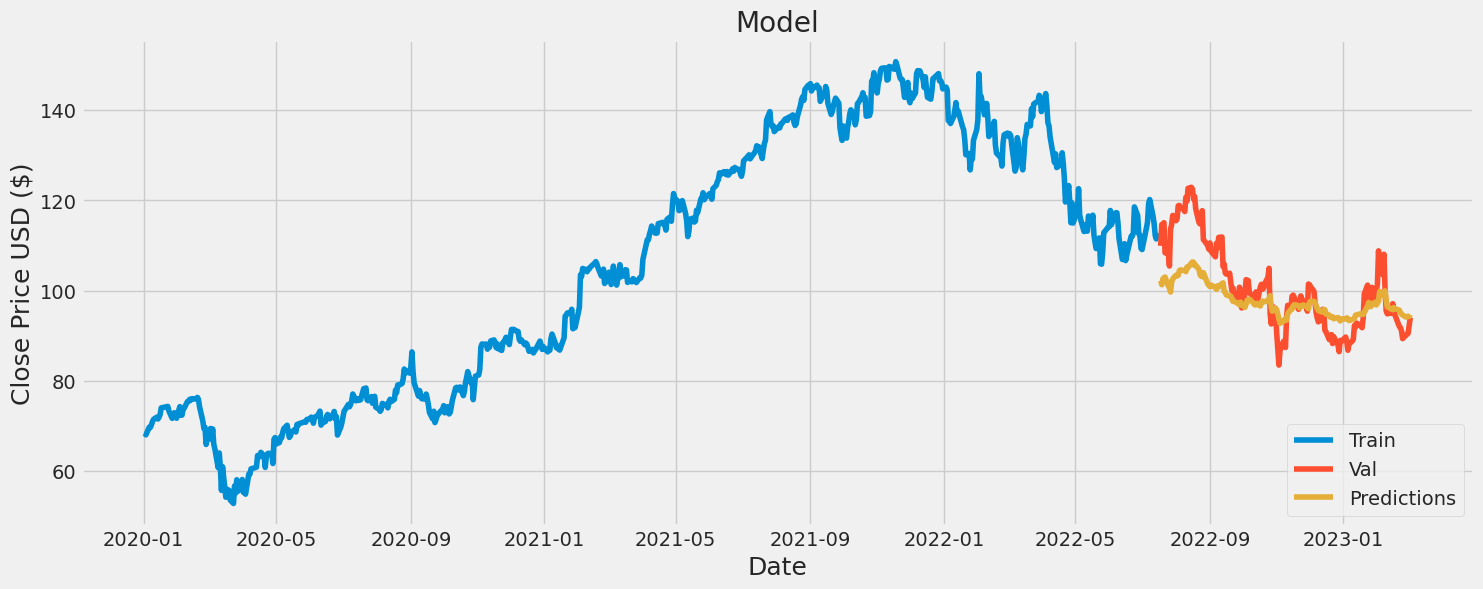

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.savefig('Quantum_prediction.png', dpi=300)
plt.show()